# Assignment - Data Visualization/Exploratory Data Analysis
## Data Collection and Data Cleaning

### Importing all required packages

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Load the Dataset

In [2]:
data = pd.read_csv('D:/My-Projects/DAML-Project/DataSet/tata.csv')

In [3]:
#View of dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-09,155.334000,161.141998,154.343994,160.212006,128.496658,29347238.0
1,2010-04-12,160.270996,160.270996,153.968994,154.552002,123.957092,29781931.0
2,2010-04-13,154.938004,155.669998,150.604996,153.296005,122.949738,49489395.0
3,2010-04-15,154.343994,157.787994,152.761002,153.423996,123.052391,30353385.0
4,2010-04-16,153.354996,156.214005,153.216995,155.283997,124.544197,17014036.0


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2505,2020-06-02,90.000000,97.300003,89.750000,96.500000,96.500000,125407771.0
2506,2020-06-03,100.000000,101.449997,97.400002,98.750000,98.750000,90598067.0
2507,2020-06-04,99.000000,101.400002,96.800003,98.500000,98.500000,72078707.0
2508,2020-06-05,100.449997,112.449997,99.050003,110.750000,110.750000,187209208.0
2509,2020-06-08,114.000000,119.150002,113.349998,115.449997,115.449997,136943010.0


### Checking numerical and categorical data

In [5]:
#Check datatype
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Data type of 'Date' is object. Rest of the data is in numerical form which is appropriate

In [6]:
#shape of the dataset
data.shape

(2510, 7)

In [7]:
#some statistical information about data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2.503000e+03
mean,315.110124,319.604985,310.055880,314.632045,309.719245,1.464909e+07
std,127.348791,128.405744,125.993359,127.127318,130.954874,1.695092e+07
min,66.500000,66.900002,63.500000,65.300003,65.300003,0.000000e+00
25%,202.240997,205.391998,199.782006,202.656502,187.865661,6.189464e+06
50%,295.826996,300.476990,290.299988,295.975006,292.810089,9.265718e+06
75%,422.399994,427.250000,417.199997,421.925003,421.899994,1.556190e+07
max,600.211975,605.901001,589.872986,598.133972,597.891846,1.872092e+08


In [8]:
# a broader description of the data
pdp.ProfileReport(data)

In [9]:
#Checking NULL values
data.isna().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [10]:
data[data.isnull().any(axis = 1)]

,Date,Open,High,Low,Close,Adj Close,Volume
437,2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
476,2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
606,2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
648,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
985,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
1214,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2359,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN


As there are very less NaN rows so we will drop it.

In [11]:
#Dropping rows with null values
data.dropna(axis = 0,inplace = True)

In [12]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Now there are no NaN values in the dataset

## Formatting data(Making datatypes compatible)

In our dataset only 'Date' are in object form which need to be changed to 'DateTime' format

In [13]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
#Again check the datatypes
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [16]:
#sort the data according to 'Date'
data.sort_values('Date',inplace = True)

In [17]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-09,155.334000,161.141998,154.343994,160.212006,128.496658,29347238.0
1,2010-04-12,160.270996,160.270996,153.968994,154.552002,123.957092,29781931.0
2,2010-04-13,154.938004,155.669998,150.604996,153.296005,122.949738,49489395.0
3,2010-04-15,154.343994,157.787994,152.761002,153.423996,123.052391,30353385.0
4,2010-04-16,153.354996,156.214005,153.216995,155.283997,124.544197,17014036.0


## Univariate analysis
### Data analysis using Data Visualization

In [18]:
#boxplot to know the statistic of each column

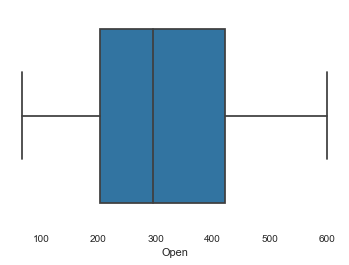

In [19]:
sb.boxplot(data.Open)
plt.show()

We can see that minimum value in column 'Open' is less than 100, maximum value is near 600. 25% quartile is near 200,median is around 300 and 75% quartile is around 410-430. There are no outliers in the 'Open' Column.

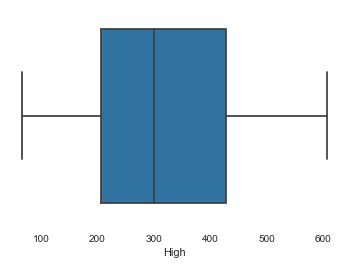

In [20]:
sb.boxplot(data['High'])
plt.show()

We can see that minimum value in column 'High' is less than 100, maximum value is near 600. 25% quartile is near 200,median is around 300 and 75% quartile is around 420-430. There are no outliers in the 'High' Column.

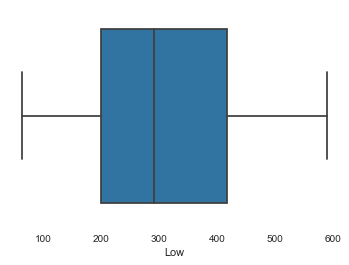

In [21]:
sb.boxplot(data.Low)
plt.show()

We can see that minimum value in column 'Low' is less than 100, maximum value is near 600. 25% quartile is near 200,median is around 300 and 75% quartile is around 420. There are no outliers in the 'Low' Column.

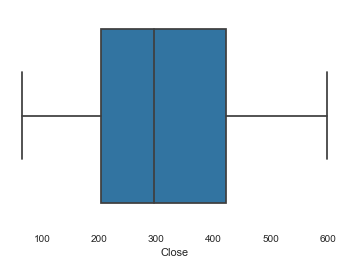

In [22]:
sb.boxplot(data.Close)
plt.show()

We can see that minimum value in column 'Close' is less than 100, maximum value is near 600. 25% quartile is near 200,median is around 300 and 75% quartile is around 410-430. There are no outliers in the 'Close' Column.

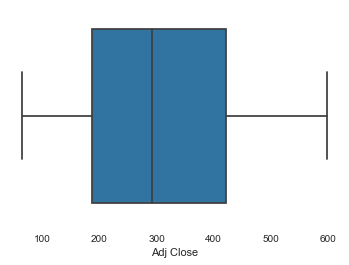

In [23]:
sb.boxplot(data['Adj Close'])
plt.show()

We can see that minimum value in column 'Adj Close' is less than 100, maximum value is near 600. 25% quartile is 190-200,median is in between 290-300 and 75% quartile is around 410-430. There are no outliers in the 'Adj Close' Column.

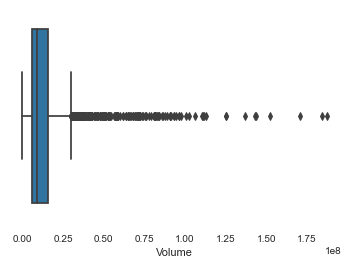

In [24]:
sb.boxplot(data['Volume'])
plt.show()

We can see that there are too many outliers in the data

## Check the distribution of data

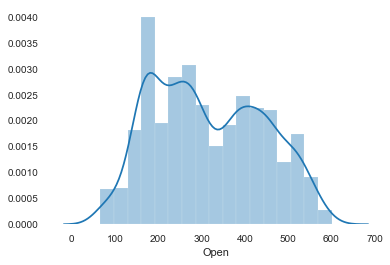

In [25]:
sb.distplot(data.Open)
plt.show()

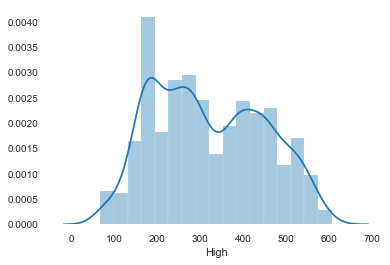

In [26]:
sb.distplot(data.High)
plt.show()

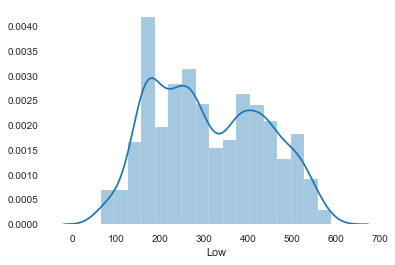

In [27]:
sb.distplot(data.Low)
plt.show()

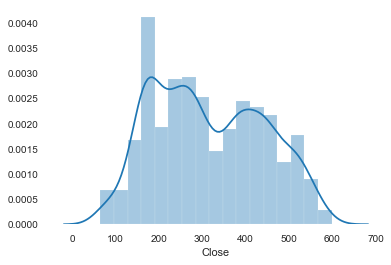

In [28]:
sb.distplot(data.Close)
plt.show()

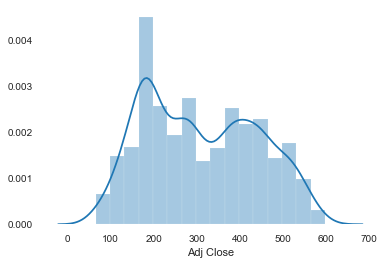

In [29]:
sb.distplot(data['Adj Close'])
plt.show()

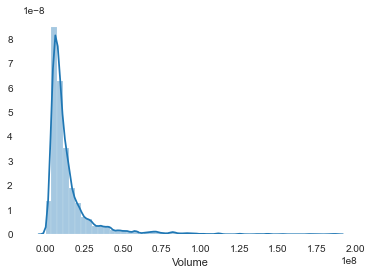

In [30]:
sb.distplot(data.Volume)
plt.show()

## Bivariate Analysis

In [31]:
#store the columns of the data in a list
columns = data.columns
#remove column of date from the list
columns = columns[1:]
columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

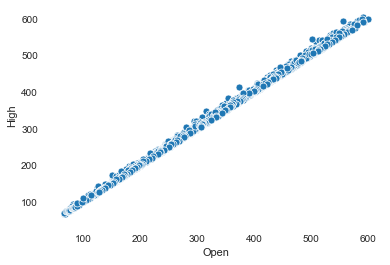

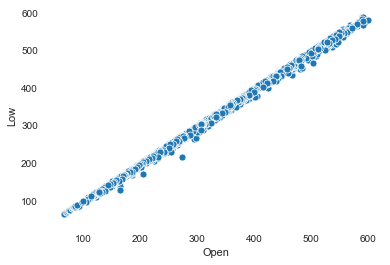

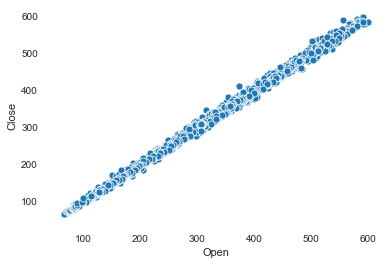

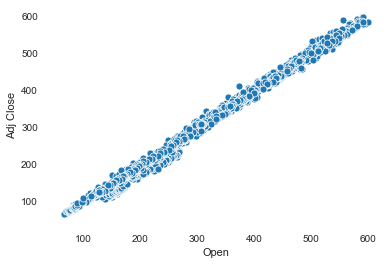

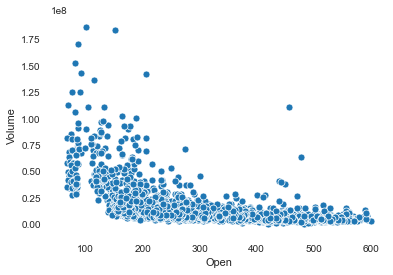

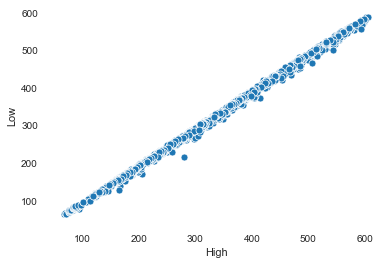

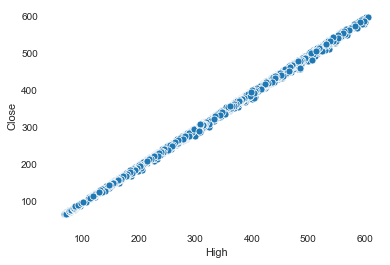

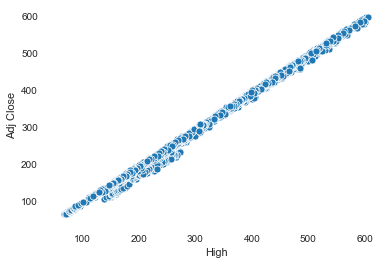

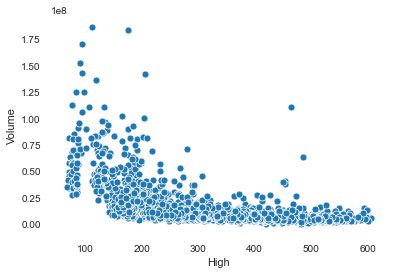

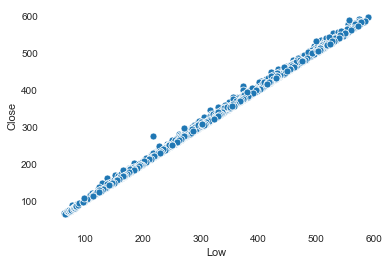

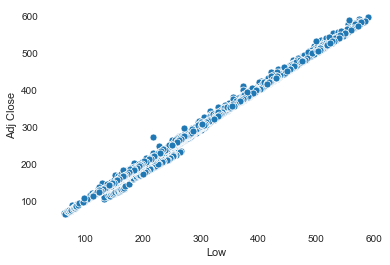

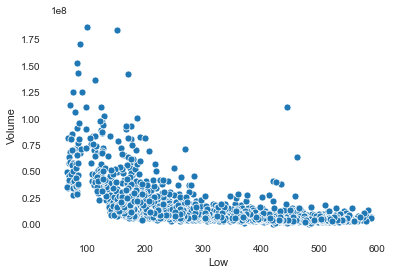

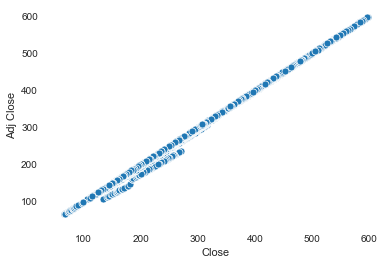

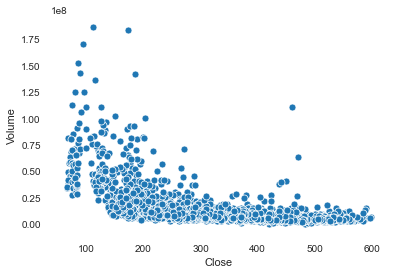

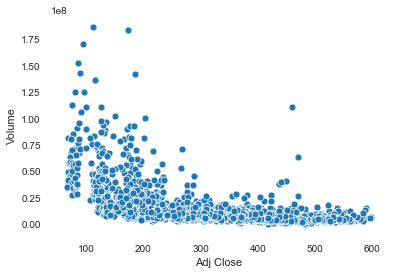

In [32]:
#plotting scatter plot between each column to know the bivariate distribution of the data
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if i == j:
            continue
        else:
            sb.scatterplot(data[columns[i]],data[columns[j]],legend = 'brief')
            plt.show()

## Checking for outliers

In [33]:
#Import required packages

In [34]:
from scipy import stats

In [35]:
# Here we use zscore to identify outliers.
# If zscore is greater than 3 or less than -3 then it will be considered as outlier

### Outliers in Column 'Open'

In [36]:
z_open = stats.zscore(data.Open)

In [37]:
#Check for minimum and maximum zscore
print(z_open.min())
print(z_open.max())

-1.9525886320982753
2.239195350744357


We can see there are  no outliers in column 'Open'

### Outliers in Column 'High'

In [38]:
z_high = stats.zscore(data.High)
print(z_high.min())
print(z_high.max())

-1.9684125509543309
2.230065528318003


It is obvious that there are no outliers in column 'High'

### Outliers in Column 'Low'

In [39]:
z_low = stats.zscore(data.Low)
print(z_low.min())
print(z_low.max())

-1.957286870943349
2.2213315232307567


There are no outliers in column 'Low'

### Outliers in Column 'Close'

In [40]:
z_close = stats.zscore(data.Close)
print(z_close.min())
print(z_close.max())

-1.9616701378675516
2.2305085955497526


No outliers in column 'Close'

### Outliers in Column 'Adj Close'

In [41]:
z_aclose = stats.zscore(data['Adj Close'])
print(z_aclose.min())
print(z_aclose.max())

-1.866811623687987
2.2009885877052326


No outliers in column 'Adj Close'

### Outliers in Column 'Volume'

In [42]:
z_vol = stats.zscore(data.Volume)
print(z_vol.min())
print(z_vol.max())

-0.8643792468299119
10.182021659862707


There are outliers in Volume

# Removing Outliers
In our dataset,only 'Volume' column consists of outliers. So we will remove outliers from 'Volume' Column

In [43]:
z_vol = abs(z_vol)
outlier = np.where(z_vol > 3)
outlier = list(outlier[0])
print(outlier)

[86, 87, 656, 1515, 2099, 2183, 2216, 2217, 2222, 2294, 2310, 2314, 2315, 2319, 2320, 2321, 2323, 2324, 2325, 2330, 2344, 2347, 2353, 2354, 2355, 2378, 2384, 2385, 2418, 2419, 2420, 2422, 2432, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2463, 2464, 2465, 2466, 2469, 2477, 2478, 2483, 2484, 2485, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502]


In [44]:
data.shape

(2503, 7)

In [45]:
data.drop(outlier,inplace = True)

In [46]:
data.shape

(2437, 7)

We removed the rows with outliers

# Correlation Matrix to Identify Relevent Columns

In [47]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999406,0.999327,0.998700,0.996423,-0.514988
High,0.999406,1.000000,0.999339,0.999555,0.997320,-0.509011
Low,0.999327,0.999339,1.000000,0.999432,0.997044,-0.518687
Close,0.998700,0.999555,0.999432,1.000000,0.997624,-0.512351
Adj Close,0.996423,0.997320,0.997044,0.997624,1.000000,-0.500368
Volume,-0.514988,-0.509011,-0.518687,-0.512351,-0.500368,1.000000


We can see that there is a positive and high correlation among 'Open','High','Low','Close','Adj Close'.
'Volume' is negatively correlated with other columns

## Correlation Matrix

In [48]:
corr_mat = data.corr()

(6.5, -0.5)

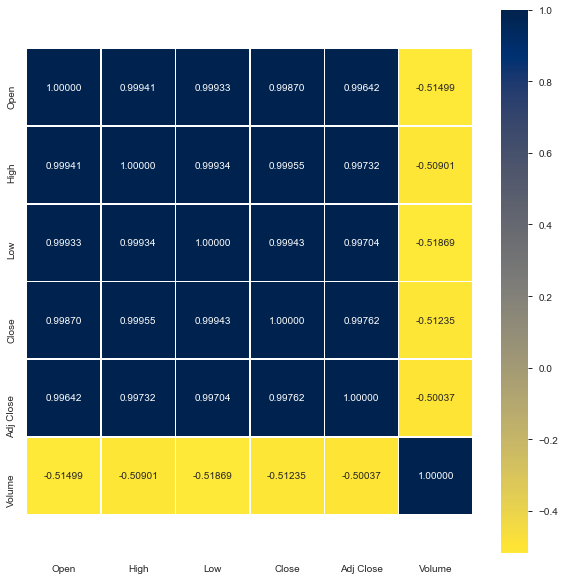

In [49]:
correlation_matrix = data.corr()
a,b = plt.subplots(figsize=(10, 10))
b= sb.heatmap(correlation_matrix,annot=True,linewidths=0.5,fmt=".5f",
               cmap="cividis_r")
bottom, top = b.get_ylim()
b.set_ylim(bottom + 0.5, top - 0.5)

These are highly correlated with each other
* Open with High,Low,Close,Adj Close
* High with Open,Low,Close,Adj Close
* Low with Open,High,Close,Adj Close
* Close with Open,High,Low,Adj Close
* Adj Close with Open,High,Low,Close

Below are very less correlated 
* Volume and all other columns

# Final Model

In [50]:
test_size = 0.1 #Data used for testing model
cv_size = 0.1 #Data used to select the best number of samples for predictions
max_sample = 30 #Maximum Number of days used to predict the stock price

In [51]:
from sklearn.linear_model import LinearRegression
def predictPrice(dataset,num_of_samples,offset):
    '''
    dataset : dateset with values you want to predict
    num_of_samples : number of samples used to fit the linear model
    offset : We will be doing predictions for data after the offset i.e. dataset[offset:]. in other words it is our test data
    '''
    #Create Linear Regression object
    reg = LinearRegression()
    
    #List of predicted values for different number of samples
    pred_list = []
    
    #fit the linear model and predict prices for different days
    for i in range(offset,len(dataset['Adj Close'])):
        
        #Divide the dataset into train and test part
        x_train = np.array(range(len(dataset['Adj Close'][i-num_of_samples:i]))) #converting the dates into simple indices
        y_train = np.array(dataset['Adj Close'][i-num_of_samples:i]) #Taking values of Adj_close
        
        x_train = x_train.reshape(-1,1)
        y_train = y_train.reshape(-1,1)
        #print(x_train)
        #print(y_train)
        #print('shpae x ',x_train.shape)
        #print('shpae y ',y_train.shape)
        #fit the model into the LinearRegression Object and train the model
        reg.fit(x_train,y_train)
        
        #predict the price on num_of_sample day
        pred = reg.predict(np.array(num_of_samples).reshape(-1,1))
        pred_list.append(pred[0][0])
    
    return pred_list

In [52]:
num_test = int(len(data)*test_size) #test data size
num_cv = int(len(data)*cv_size) #cross-validation data size
num_train = len(data) - num_test - num_cv #train data size


#splitting the data into train,test and cross-validation
train_data = data[:num_train].copy()
cv_data = data[num_train:num_train+num_cv].copy()
train_cv = data[:num_train + num_cv].copy()
test_data = data[num_train+num_cv:].copy()

print("Train data shape ",train_data.shape)
print("Train and CV data shape ",train_cv.shape)
print("Test data shape ",test_data.shape)
print("CV data shape ",cv_data.shape)

Train data shape  (1951, 7)
Train and CV data shape  (2194, 7)
Test data shape  (243, 7)
CV data shape  (243, 7)


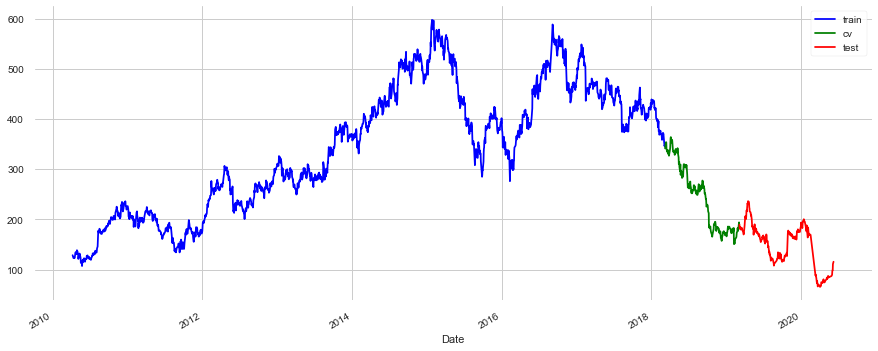

In [53]:
#A view of train,cv and test data
mpl.rcParams['figure.figsize'] = 15,6
ax = train_data.plot(x = 'Date',y = 'Adj Close',style = 'b-')
ax = cv_data.plot(x = 'Date',y = 'Adj Close',style = 'g-',ax = ax)
ax = test_data.plot(x = 'Date',y = 'Adj Close',style = 'r-',ax = ax)
plt.legend(['train','cv','test'])
plt.grid()
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
rmse = [] #list to store the root mean squared error for different samples
r2_score_err = [] #List to store the r2_score_error for different samples
#predict the price for different number of samples
for num_of_samples in range(1,max_sample+1):
    '''
    train_cv : Dataset consisting training and cross validation dataset
    num_of_samples : Number of samples used to train the model
    num_train : Size of train dataset
    
    return :Estimated price for cv dataset
    '''
    pred = predictPrice(train_cv,num_of_samples,num_train)
    #Add the current predicted value to the cv dataset
    cv_data.loc[:,'pred_for_N_'+str(num_of_samples)] = pred
    
    #Calculate the RMSE value and append it to the RMSE list
    rmse.append(mse(pred,cv_data['Adj Close'],squared = False))
    
    #Calculate the r2_score and append it to r2_score_err list
    r2_score_err.append(r2_score(pred,cv_data['Adj Close']))

In [55]:
cv_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pred_for_N_1,pred_for_N_2,pred_for_N_3,...,pred_for_N_21,pred_for_N_22,pred_for_N_23,pred_for_N_24,pred_for_N_25,pred_for_N_26,pred_for_N_27,pred_for_N_28,pred_for_N_29,pred_for_N_30
1961,2018-03-09,345.549988,348.700012,340.149994,341.500000,341.500000,5519224.0,345.149994,342.500000,345.133321,...,351.979755,350.579864,350.644460,349.993473,349.121994,348.817686,348.439738,348.174201,347.845438,346.727925
1962,2018-03-12,345.000000,353.799988,340.350006,352.600006,352.600006,8238960.0,341.500000,337.850006,338.516673,...,348.290947,348.782461,347.526279,347.653980,347.089995,346.304303,346.054695,345.728963,345.506769,345.219650
1963,2018-03-13,352.600006,356.450012,350.000000,353.149994,353.149994,6184241.0,352.600006,363.700012,353.866679,...,347.458805,347.594153,348.030233,346.798728,346.887496,346.314766,345.526777,345.252774,344.906030,344.659652
1964,2018-03-14,351.000000,354.899994,349.600006,354.049988,354.049988,3820313.0,353.149994,353.699982,360.733327,...,346.768330,347.046749,347.131222,347.508872,346.292496,346.338765,345.751563,344.955552,344.653444,344.281950
1965,2018-03-15,354.049988,358.399994,351.100006,353.100006,353.100006,4331145.0,354.049988,354.949982,354.716645,...,345.891185,346.676618,346.885369,346.915575,347.231994,346.022149,346.022502,345.415471,344.606029,344.272178


In [56]:
print(rmse)

[6.018203992415873, 8.22343509134179, 7.501127705078323, 7.3357940782120385, 7.43317264984623, 7.786990673519228, 8.129270002299382, 8.378855683467123, 8.62945094741683, 8.903254308295004, 9.229693216405225, 9.599788208937733, 9.903573233762506, 10.195550029898483, 10.47810204712622, 10.737476471018391, 10.963986872361035, 11.192051940798732, 11.440894326713643, 11.68467148651093, 11.933361633123226, 12.2012639890943, 12.483870184927293, 12.754965400260318, 13.022261427153499, 13.301693805309075, 13.575759598798939, 13.845028925476456, 14.104218865461362, 14.337456848623777]


## Graph of RMSE vs num_of_samples

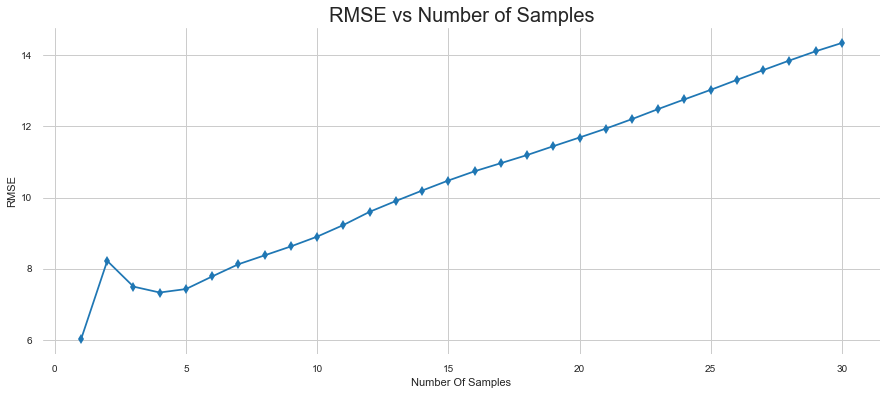

In [57]:
x = np.arange(1,max_sample+1)
plt.plot(x,rmse,'d-')
plt.xlabel("Number Of Samples")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of Samples",size = 20)
plt.grid()
plt.show()

## Graph of r2_score vs num_of_samples

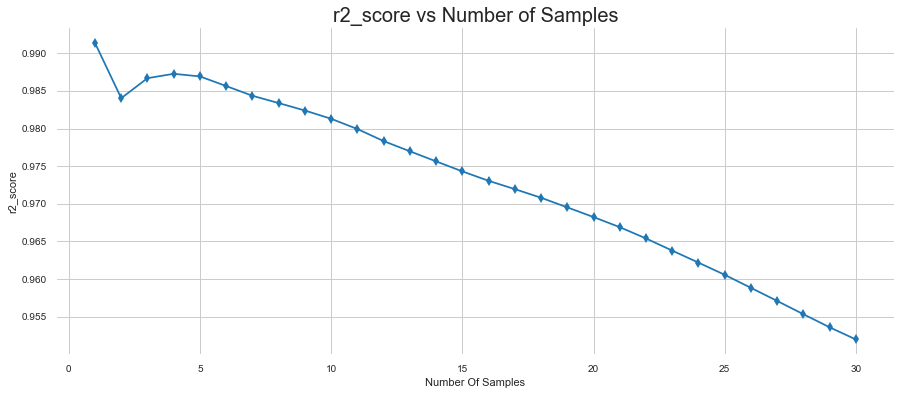

In [58]:
plt.plot(x,r2_score_err,'d-')
plt.xlabel("Number Of Samples")
plt.ylabel("r2_score")
plt.title("r2_score vs Number of Samples",size = 20)
plt.grid()
plt.show()

* It is observed from the analysis that the minimum 'root_mean_squared_error' and maximum r2_score is obtained when we take the number of samples = 1.
* Next minimum rmse and maximum r2_score is obtained from 4 to 5.
* Since we are usign Linear Regression, hence we will take the number of samples = 5.

## Graph between actual value and predicted value for num_of_samples = 5

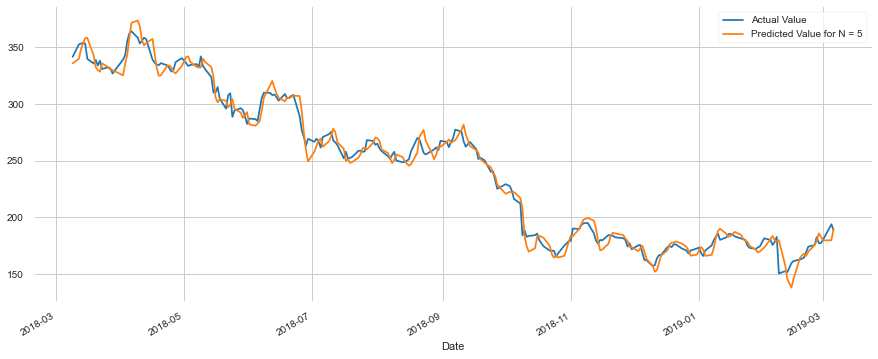

In [59]:
ax = cv_data.plot(x='Date',y='Adj Close')
ax = cv_data.plot(x='Date',y='pred_for_N_5',ax = ax)
plt.grid()
plt.legend(['Actual Value','Predicted Value for N = 5'])
plt.show()

## Predictions on Test data

In [60]:
num_of_samples = 5
pred = predictPrice(data,num_of_samples,num_train+num_cv)
test_data.loc[:,"Predicted Adj Close"] = pred

In [61]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Predicted Adj Close
2206,2019-03-07,191.399994,193.449997,187.800003,189.300003,189.300003,27051501.0,195.440002
2207,2019-03-08,187.800003,187.949997,180.000000,181.199997,181.199997,28012914.0,195.640005
2208,2019-03-11,182.000000,184.600006,181.050003,181.850006,181.850006,25669662.0,185.844998
2209,2019-03-12,184.399994,186.000000,183.550003,184.800003,184.800003,18657724.0,177.440002
2210,2019-03-13,184.449997,184.899994,180.399994,181.699997,181.699997,9769821.0,180.555003


In [62]:
#root_mean_squared_error
rmse = mse(test_data['Adj Close'],pred)

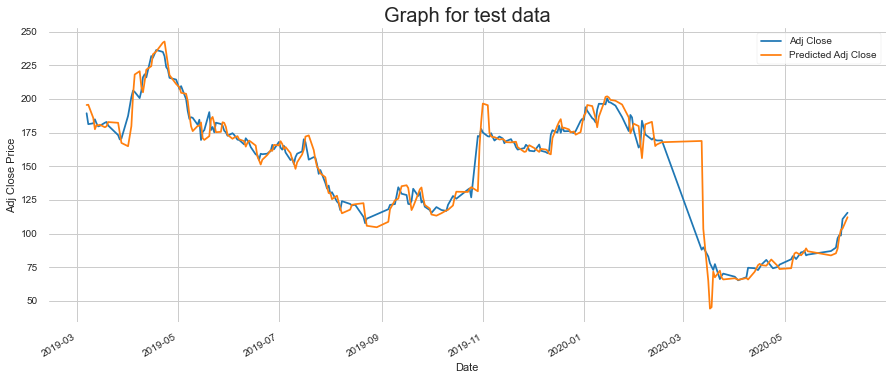

In [63]:
#Visualization on test data and predicted value
ax = test_data.plot(x='Date',y='Adj Close')
ax = test_data.plot(x='Date',y='Predicted Adj Close',ax = ax)
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Graph for test data",size = 20)
plt.show()

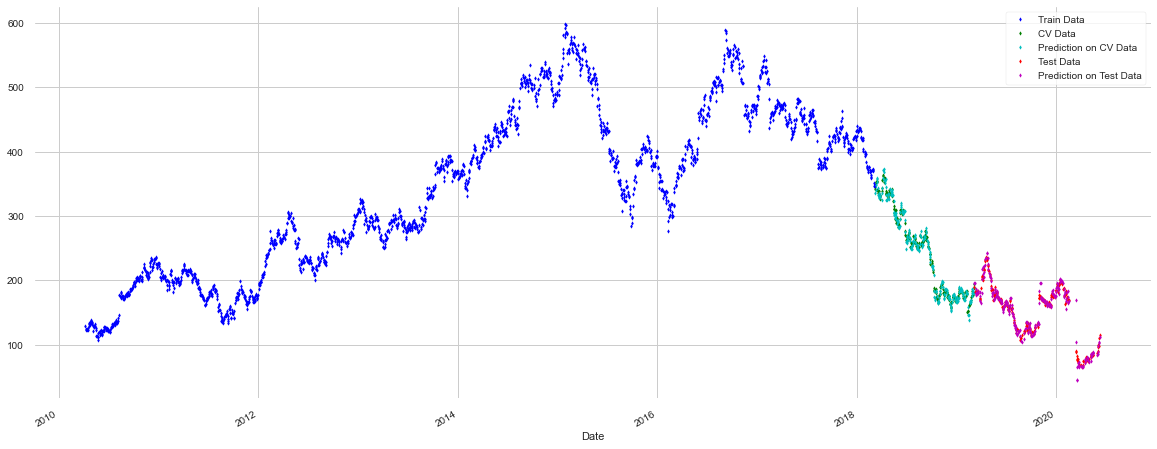

In [64]:
mpl.rcParams['figure.figsize'] = 20,8
ax = train_data.plot(x = 'Date',y = 'Adj Close',style = 'bd',markersize = 3)
ax = cv_data.plot(x = 'Date',y = 'Adj Close',style = 'gd',ax = ax,markersize = 3)
ax = cv_data.plot(x = 'Date',y = 'pred_for_N_5',style = 'cd',ax = ax,markersize = 3)
ax = test_data.plot(x = 'Date',y = 'Adj Close',style = 'rd',ax = ax,markersize = 3)
ax = test_data.plot(x = 'Date',y = 'Predicted Adj Close',style = 'md',ax = ax,markersize = 3)
plt.legend(['Train Data','CV Data','Prediction on CV Data','Test Data','Prediction on Test Data'])
plt.grid()
plt.show()

## Predictions for a specific day

In [65]:
from tkinter import *

class Placeholder_State(object):
     __slots__ = 'normal_color', 'normal_font', 'placeholder_text', 'placeholder_color', 'placeholder_font', 'with_placeholder'

def add_placeholder_to(entry, placeholder, color="grey", font=None):
    normal_color = entry.cget("fg")
    normal_font = entry.cget("font")
    
    if font is None:
        font = normal_font

    state = Placeholder_State()
    state.normal_color=normal_color
    state.normal_font=normal_font
    state.placeholder_color=color
    state.placeholder_font=font
    state.placeholder_text = placeholder
    state.with_placeholder=True

    def on_focusin(event, entry=entry, state=state):
        if state.with_placeholder:
            entry.delete(0, "end")
            entry.config(fg = state.normal_color, font=state.normal_font)
        
            state.with_placeholder = False

    def on_focusout(event, entry=entry, state=state):
        if entry.get() == '':
            entry.insert(0, state.placeholder_text)
            entry.config(fg = state.placeholder_color, font=state.placeholder_font)
            
            state.with_placeholder = True

    entry.insert(0, placeholder)
    entry.config(fg = color, font=font)

    entry.bind('<FocusIn>', on_focusin, add="+")
    entry.bind('<FocusOut>', on_focusout, add="+")
    
    entry.placeholder_state = state

    return state

main_window = Tk()
main_window.geometry('500x280')
main_window.title('Stock Market Price Predictor')

def openResultWindow():
    
    date = e1.get()
    
    max_samples = int(e2.get())
        
    try:
        text.set('')
        date = pd.to_datetime(date)

        if(max_samples < 0 or max_samples >30):
            raise Exception()
            
        result_window = Toplevel(main_window)
        height = max_samples
        width = 400

        if height <= 5 :
            size = str(width)+"x"+str(130)
        else :
            size = str(width)+"x"+str(30+int(height*20))

        result_window.geometry(size)
        result_window.title('Predicted Result')
        lbl5 = Label(result_window, text='PREDICTED RESULT')
        lbl5.grid(row=3,column=0,columnspan=3,pady=20)

        #Take the dataset before the date
        df = data[data.Date < date]
        offset = np.where(data.Date < date)
        offset = offset[-1][-1]
        #print(offset)
        #print(data.iloc[offset])

        #if max_samples < 5 
        if(max_samples < 5):
            max_samples = 5

        #predic the prices for given number of samples
        pred_list = []
        for num_of_samples in range(5,max_samples+1):
            pred = predictPrice(df,num_of_samples,offset)
            pred_list.append(pred)

        result_list = []

        for day in range(len(pred_list)):
            result_list.append(pred_list[day])
            result_text = "Predictions using "+str(5+day)+" days is "+str(pred_list[day])
            Label(result_window, text=result_text).grid(row=4+day,column=0)

        bestResult_value = max(result_list)

        for i in range(len(result_list)):
            if(bestResult_value == result_list[i]) :
                bestResult_days = i

        bestResult_text = "Highest Predicted Value is using "+str(5+bestResult_days)+" days and Value is "+str(bestResult_value)
        Label(result_window, text=bestResult_text).grid(row=5+max_samples,column=0)

        result_window.mainloop()
        
    except:
        if(max_samples < 0 or max_samples >30):
            text.set('Enter the number within specified range!!!')
        else:
            text.set('Enter the date in the specified format!!!')
        resetAllEntry()
    
    
def resetAllEntry():
    e1.delete(0,END)
    add_placeholder_to(e1,'yyyy-mm-dd')
    e2.delete(0,END)
    add_placeholder_to(e2,'number<=30')
    
    

    
    
    
lbl1 = Label(main_window, text='STOCK MARKET PRICE PREDICTOR')
lbl1.grid(row=3,column=0,columnspan=3,pady=20)
lbl2 = Label(main_window, text='Enter Date : * ')
lbl2.grid(row=5,column=0,columnspan=2,padx=10,pady=10) 
lbl3 = Label(main_window, text='Enter Number of Days to be used for predictions : * ')
lbl3.grid(row=7,column=0,columnspan=2,padx=10,pady=10) 
e1 = Entry(main_window)
e1.grid(row=5,column=2,padx=10)
add_placeholder_to(e1,'yyyy-mm-dd')
e2 = Entry(main_window)
e2.grid(row=7,column=2,padx=10)
add_placeholder_to(e2,'number<=30')
b1 = Button(main_window, text='Predict', width=25,command=openResultWindow)
b1.grid(row=9,column=1,pady=10)
b2 = Button(main_window, text='Reset', width=25,command=resetAllEntry)
b2.grid(row=9,column=2,pady=10)
lbl4 = Label(main_window, text='* Denotes Mandatory Fields')
lbl4.grid(row=11,column=0,columnspan=3,padx=10,pady=10) 
text = StringVar()
lbl6 = Label(main_window, textvariable = text)
text.set('')
lbl6.grid(row=13,column=0,columnspan=3,padx=10,pady=10) 
main_window.mainloop()